#### About
> Credit Card Fraud detection.

> Dataset Link - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [2]:
df_original = pd.read_csv('/home/suraj/ClickUp/Jan-Feb/data/creditcard.csv')
df = df_original

In [3]:
#checking unique values of target variable
np.unique(df['Class'].values.tolist())


array([0, 1])

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### 1. Data Pre-processing

In [6]:
# Data cleaning

# Check for duplicates
df = df.drop_duplicates()
# Check for missing values
df = df.dropna()
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
#feature scaling

scaler = StandardScaler()
df[['Time', 'Amount'] + ['V{}'.format(i) for i in range(1, 29)]] = scaler.fit_transform(df[['Time', 'Amount'] + ['V{}'.format(i) for i in range(1, 29)]])


In [8]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,...,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0.244200,0
1,-1.996823,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,...,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.342584,0
2,-1.996802,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,...,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,1.158900,0
3,-1.996802,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,...,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0.139886,0
4,-1.996781,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,...,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.642235,-6.102103,6.118855,-6.519873,-1.459282,-3.897079,-1.956335,-4.007632,6.196662,1.749010,...,0.295375,0.154412,1.626230,-0.841382,2.757072,0.518377,2.380049,2.509507,-0.350252,0
284803,1.642257,-0.379208,-0.030938,1.347812,-0.520175,0.629193,0.795504,0.018351,0.250814,0.535282,...,0.296413,1.275826,0.019665,-1.678330,-1.163409,-0.820253,0.168567,-0.164849,-0.254325,0
284804,1.642278,0.982354,-0.180433,-2.155033,-0.392355,1.908988,2.276699,-0.243249,0.601561,0.396215,...,0.321057,0.798074,-0.060444,1.056626,0.510299,-0.181557,0.006802,-0.082640,-0.082239,0
284805,1.642278,-0.126465,0.324660,0.464577,0.489870,-0.275808,0.469130,-0.560399,0.576734,0.359367,...,0.366919,1.104223,-0.262138,0.203081,-1.091530,1.133734,0.270523,0.317004,-0.313391,0


In [9]:
#feature engineering
df['Amount_Max'] = df.groupby(['Time'])['Amount'].transform('max')
df['Amount_Min'] = df.groupby(['Time'])['Amount'].transform('min')
df['Amount_Mean'] = df.groupby(['Time'])['Amount'].transform('mean')
df['Amount_Median'] = df.groupby(['Time'])['Amount'].transform('median')

df['V_sum'] = df[['V{}'.format(i) for i in range(1, 29)]].sum(axis=1)
df['V_mean'] = df[['V{}'.format(i) for i in range(1, 29)]].mean(axis=1)


In [10]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V27,V28,Amount,Class,Amount_Max,Amount_Min,Amount_Mean,Amount_Median,V_sum,V_mean
0,-1.996823,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,...,0.333033,-0.065850,0.244200,0,0.244200,-0.342584,-0.049192,-0.049192,2.802489,0.100089
1,-1.996823,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,...,-0.027154,0.043219,-0.342584,0,0.244200,-0.342584,-0.049192,-0.049192,3.401201,0.121471
2,-1.996802,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,...,-0.144325,-0.183824,1.158900,0,1.158900,0.139886,0.649393,0.649393,0.619255,0.022116
3,-1.996802,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,...,0.154039,0.185687,0.139886,0,1.158900,0.139886,0.649393,0.649393,-3.163440,-0.112980
4,-1.996781,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,...,0.550001,0.654234,-0.073813,0,-0.073813,-0.338670,-0.206242,-0.206242,6.451518,0.230411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.642235,-6.102103,6.118855,-6.519873,-1.459282,-3.897079,-1.956335,-4.007632,6.196662,1.749010,...,2.380049,2.509507,-0.350252,0,-0.350252,-0.350252,-0.350252,-0.350252,13.202981,0.471535
284803,1.642257,-0.379208,-0.030938,1.347812,-0.520175,0.629193,0.795504,0.018351,0.250814,0.535282,...,0.168567,-0.164849,-0.254325,0,-0.254325,-0.254325,-0.254325,-0.254325,-1.898147,-0.067791
284804,1.642278,0.982354,-0.180433,-2.155033,-0.392355,1.908988,2.276699,-0.243249,0.601561,0.396215,...,0.006802,-0.082640,-0.082239,0,-0.082239,-0.313391,-0.197815,-0.197815,6.606631,0.235951
284805,1.642278,-0.126465,0.324660,0.464577,0.489870,-0.275808,0.469130,-0.560399,0.576734,0.359367,...,0.270523,0.317004,-0.313391,0,-0.082239,-0.313391,-0.197815,-0.197815,7.060626,0.252165


In [11]:
#dimensionality reduction
pca = PCA(n_components=10)
pca_values = pca.fit_transform(df[['Time', 'Amount'] + ['V{}'.format(i) for i in range(1, 29)]])
pca_df = pd.DataFrame(data=pca_values, columns=['PCA_{}'.format(i) for i in range(1, 11)])
df = pd.concat([df.drop(['Time', 'Amount'] + ['V{}'.format(i) for i in range(1, 29)], axis=1), pca_df], axis=1)


In [12]:
df

,Class,Amount_Max,Amount_Min,Amount_Mean,Amount_Median,V_sum,V_mean,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,0.0,0.244200,-0.342584,-0.049192,-0.049192,2.802489,0.100089,0.393045,-2.459278,0.198863,0.652778,-0.078665,0.589174,0.427149,0.832087,-0.046281,-1.081149
1,0.0,0.244200,-0.342584,-0.049192,-0.049192,3.401201,0.121471,-0.398452,-2.074113,0.012565,-0.908037,-0.431302,0.184444,-0.305611,-0.832143,0.608266,1.294197
2,0.0,1.158900,0.139886,0.649393,0.649393,0.619255,0.022116,1.805540,-2.392468,0.181762,-0.893590,-0.059950,0.689277,-1.703444,1.400341,1.136999,-1.268394
3,0.0,1.158900,0.139886,0.649393,0.649393,-3.163440,-0.112980,0.357379,-1.775766,0.157937,0.244197,-0.123868,1.748073,-1.306702,0.581966,-1.595826,-0.469684
4,0.0,-0.073813,-0.338670,-0.206242,-0.206242,6.451518,0.230411,-0.024193,-1.512481,0.298240,0.671169,-0.150886,1.570934,0.551197,0.084443,0.190173,-0.663283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.0,-0.350252,-0.350252,-0.350252,-0.350252,13.202981,0.471535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284803,0.0,-0.254325,-0.254325,-0.254325,-0.254325,-1.898147,-0.067791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284804,0.0,-0.082239,-0.313391,-0.197815,-0.197815,6.606631,0.235951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284805,0.0,-0.082239,-0.313391,-0.197815,-0.197815,7.060626,0.252165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.columns

Index(['Class', 'Amount_Max', 'Amount_Min', 'Amount_Mean', 'Amount_Median',
       'V_sum', 'V_mean', 'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6',
       'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10'],
      dtype='object')

#### 2. Feature Engineering

In [14]:
#creating new features


df['Amount_Range'] = df['Amount_Max'] - df['Amount_Min']
df['V_Range'] = df['V_sum'] - df['V_mean']
df['PCA_Sum'] = df['PCA_1'] + df['PCA_2'] + df['PCA_3'] + df['PCA_4'] + df['PCA_5'] + df['PCA_6'] + df['PCA_7'] + df['PCA_8'] + df['PCA_9'] + df['PCA_10']



In [15]:
df

,Class,Amount_Max,Amount_Min,Amount_Mean,Amount_Median,V_sum,V_mean,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,Amount_Range,V_Range,PCA_Sum
0,0.0,0.244200,-0.342584,-0.049192,-0.049192,2.802489,0.100089,0.393045,-2.459278,0.198863,0.652778,-0.078665,0.589174,0.427149,0.832087,-0.046281,-1.081149,0.586784,2.702400,-0.572277
1,0.0,0.244200,-0.342584,-0.049192,-0.049192,3.401201,0.121471,-0.398452,-2.074113,0.012565,-0.908037,-0.431302,0.184444,-0.305611,-0.832143,0.608266,1.294197,0.586784,3.279730,-2.850185
2,0.0,1.158900,0.139886,0.649393,0.649393,0.619255,0.022116,1.805540,-2.392468,0.181762,-0.893590,-0.059950,0.689277,-1.703444,1.400341,1.136999,-1.268394,1.019014,0.597139,-1.103928
3,0.0,1.158900,0.139886,0.649393,0.649393,-3.163440,-0.112980,0.357379,-1.775766,0.157937,0.244197,-0.123868,1.748073,-1.306702,0.581966,-1.595826,-0.469684,1.019014,-3.050460,-2.182293
4,0.0,-0.073813,-0.338670,-0.206242,-0.206242,6.451518,0.230411,-0.024193,-1.512481,0.298240,0.671169,-0.150886,1.570934,0.551197,0.084443,0.190173,-0.663283,0.264857,6.221107,1.015313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.0,-0.350252,-0.350252,-0.350252,-0.350252,13.202981,0.471535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,12.731446,NaN
284803,0.0,-0.254325,-0.254325,-0.254325,-0.254325,-1.898147,-0.067791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-1.830356,NaN
284804,0.0,-0.082239,-0.313391,-0.197815,-0.197815,6.606631,0.235951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231151,6.370680,NaN
284805,0.0,-0.082239,-0.313391,-0.197815,-0.197815,7.060626,0.252165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231151,6.808461,NaN


#### 3. Exploratory Data Analysis

In [16]:
df_original.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

0    284315
1       492
Name: Class, dtype: int64


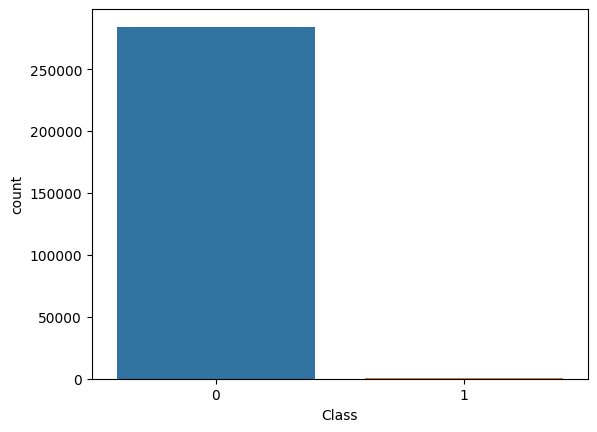

In [17]:
# Distribution of target variable
print(df_original['Class'].value_counts())
sns.countplot(df_original['Class'])


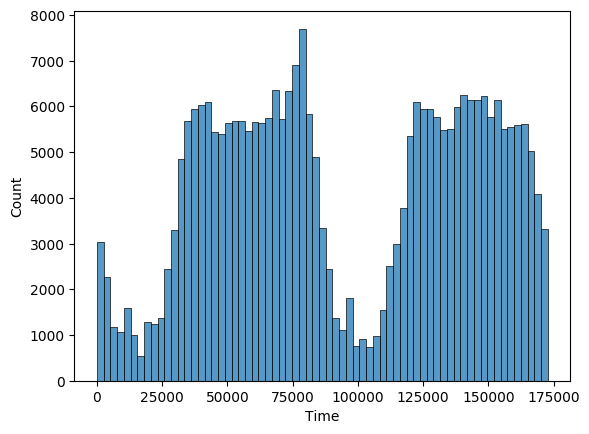

In [18]:
#distribution of time variable
sns.histplot(df_original['Time'])

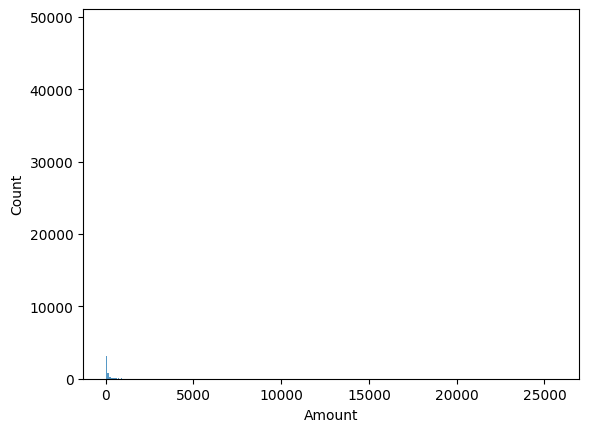

In [19]:
#distribution of amount variable
sns.histplot(df_original['Amount'])

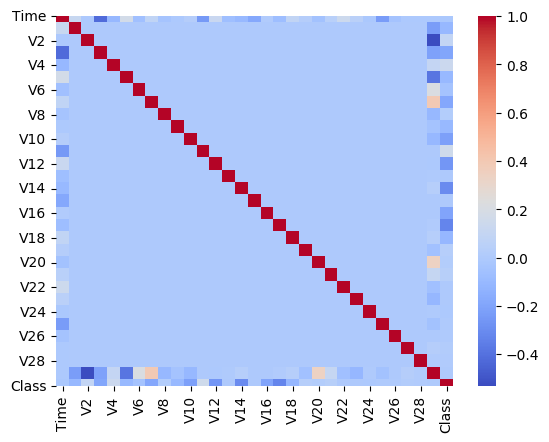

In [20]:
#correlation between variables
corr = df_original.corr()
sns.heatmap(corr, cmap='coolwarm')

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To cont

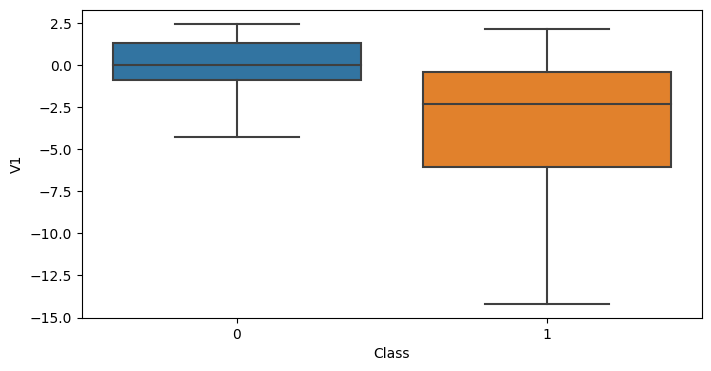

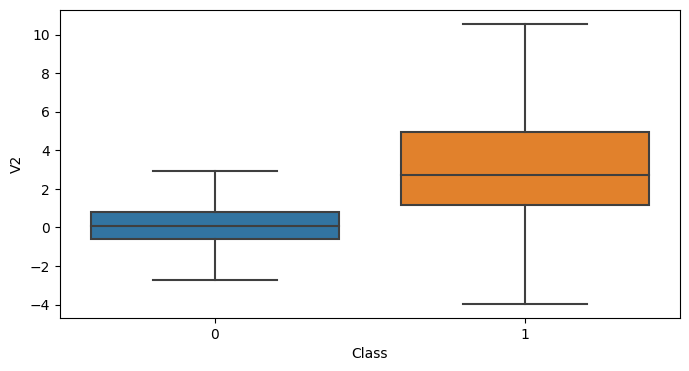

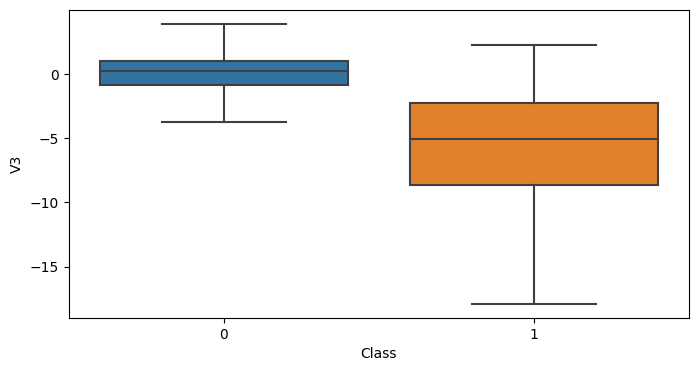

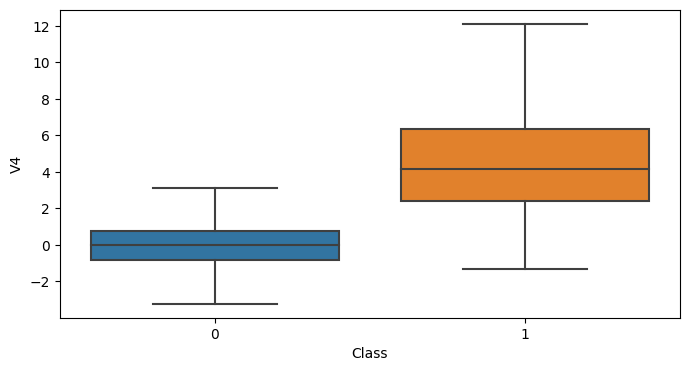

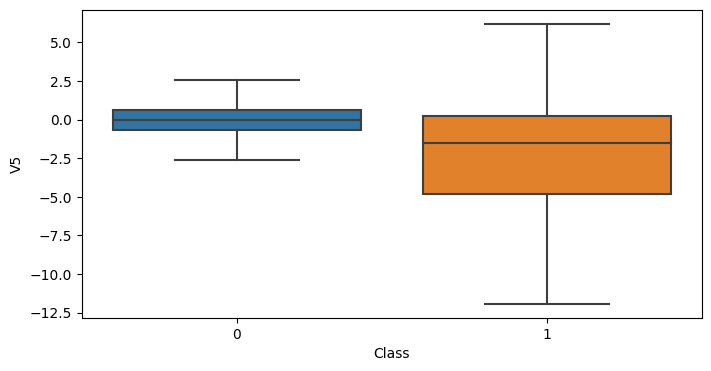

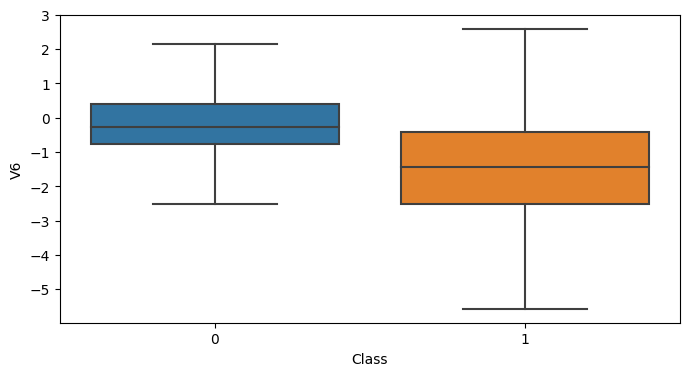

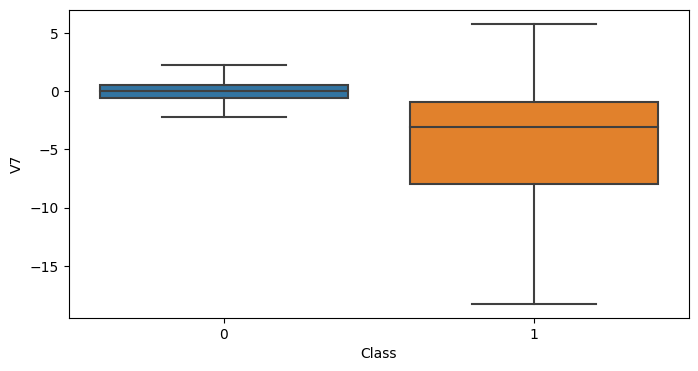

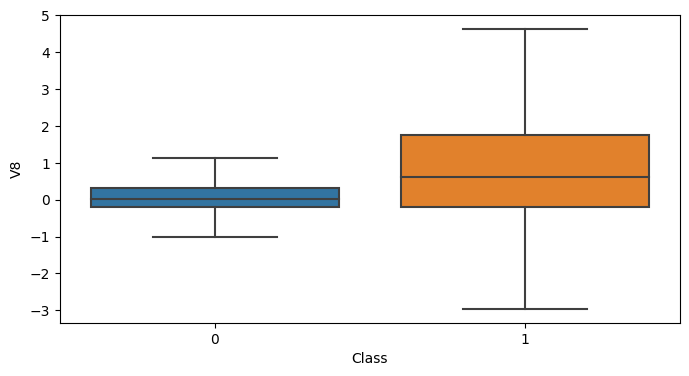

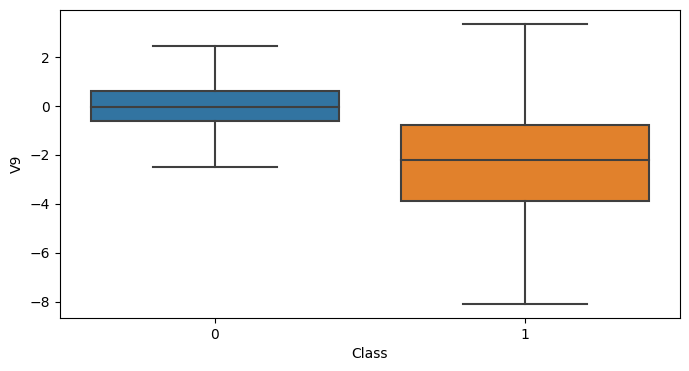

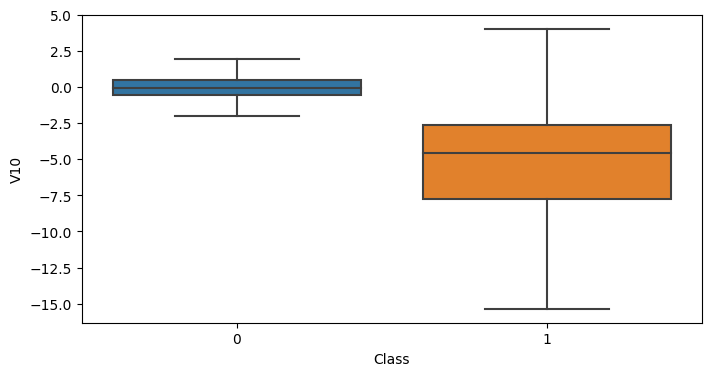

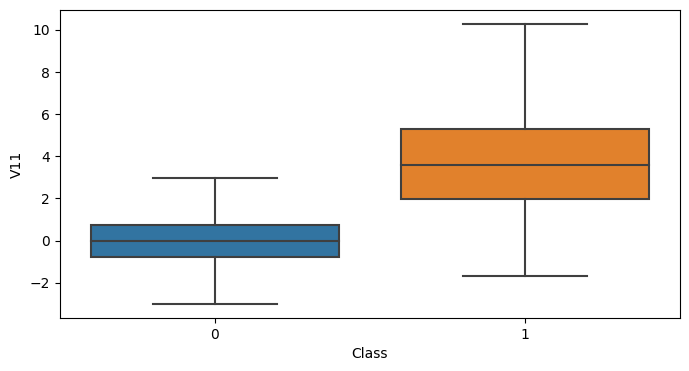

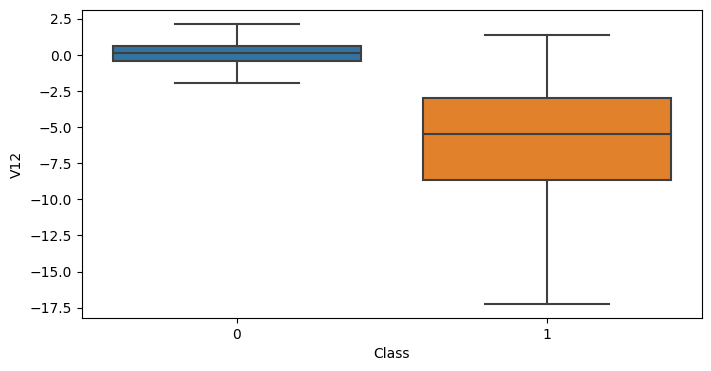

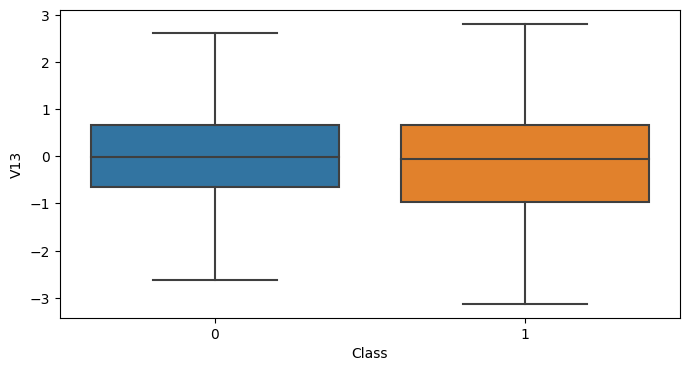

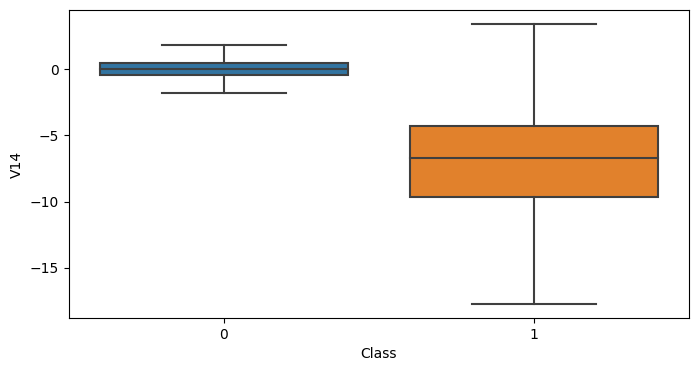

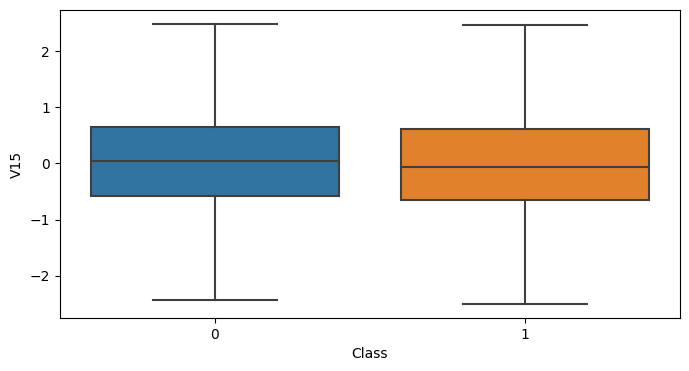

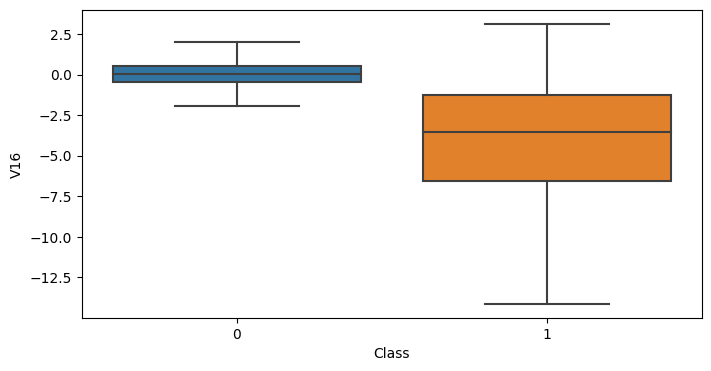

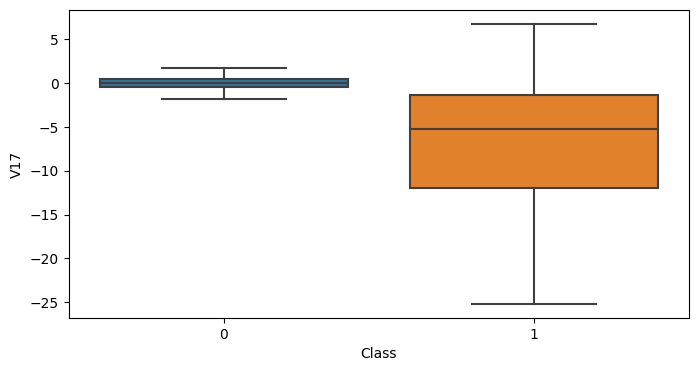

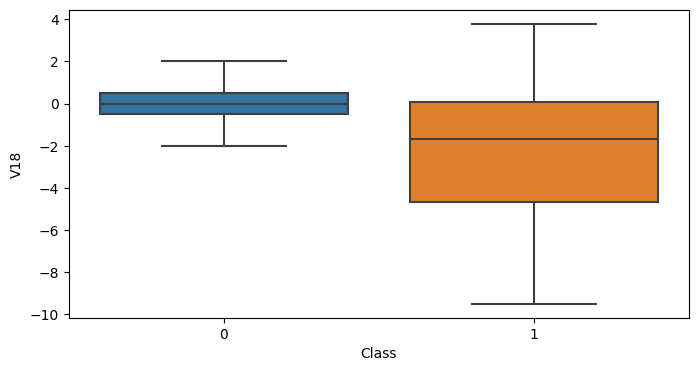

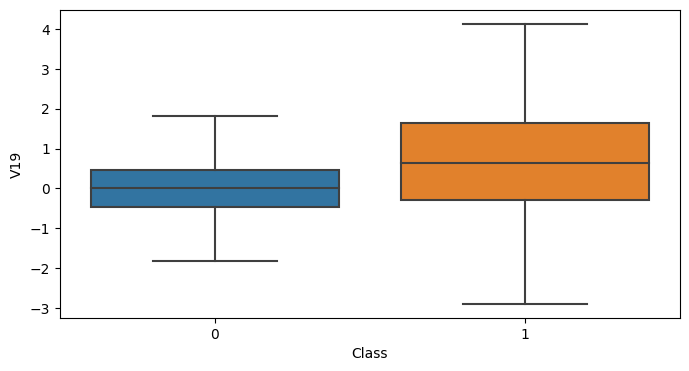

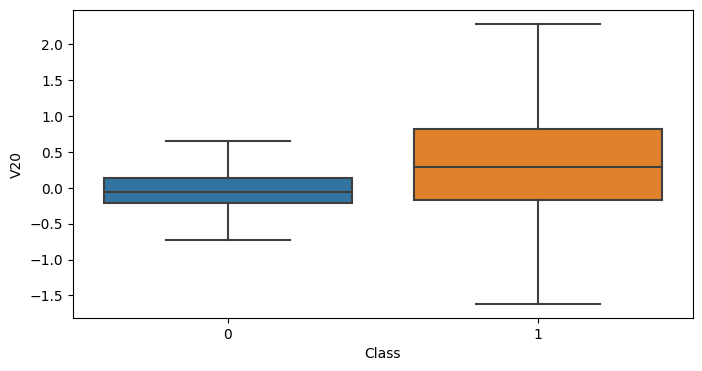

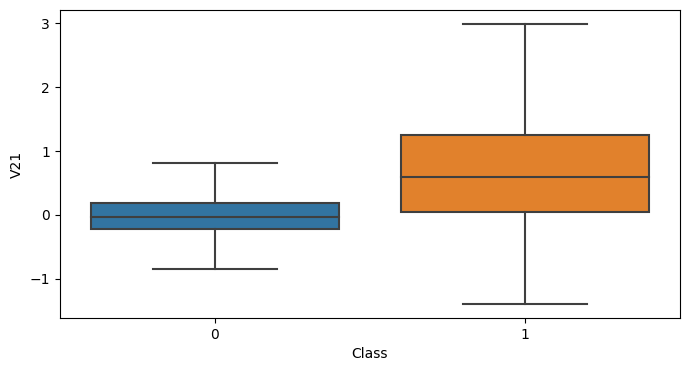

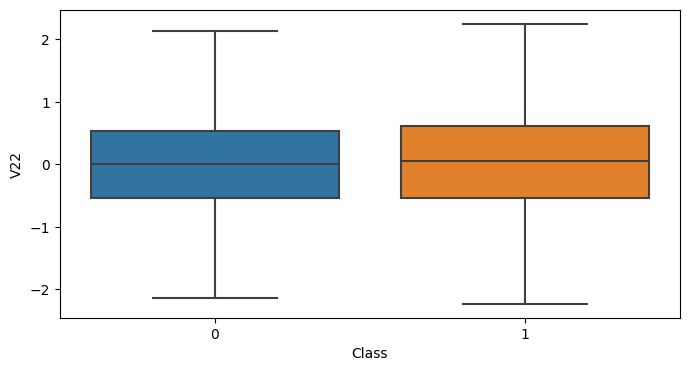

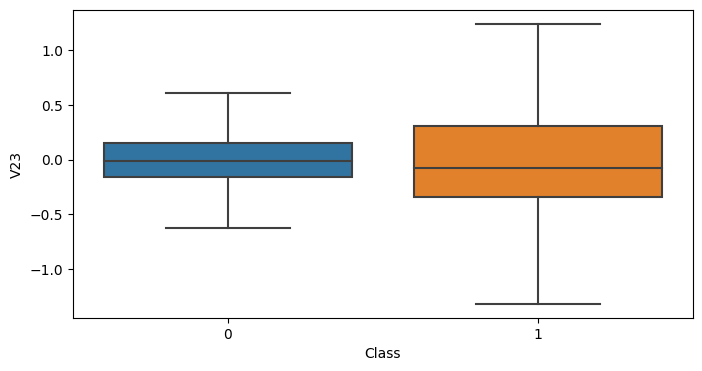

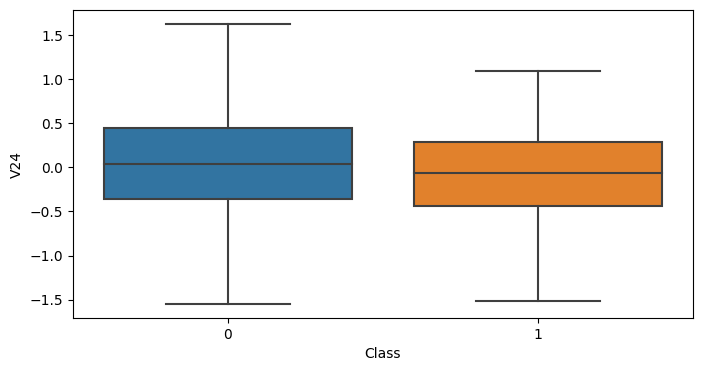

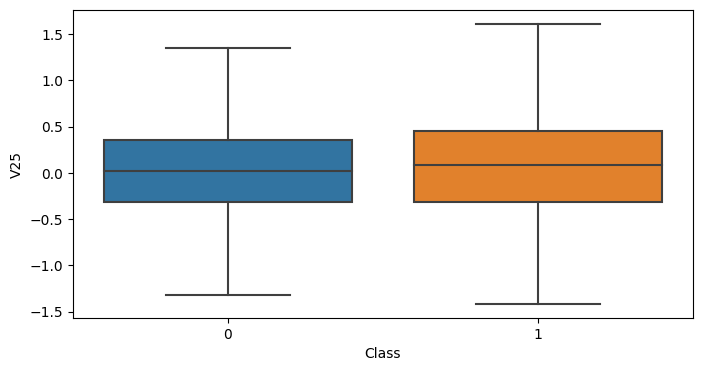

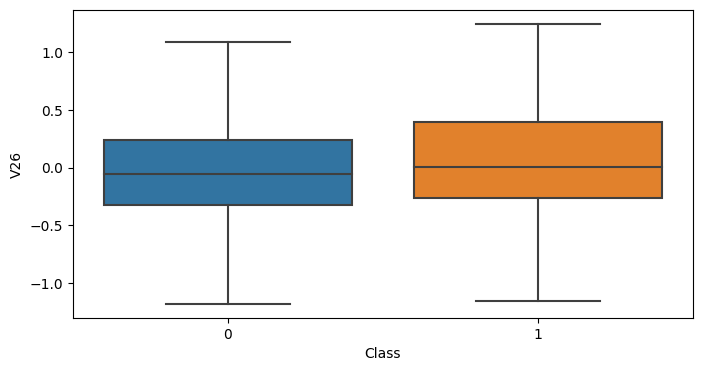

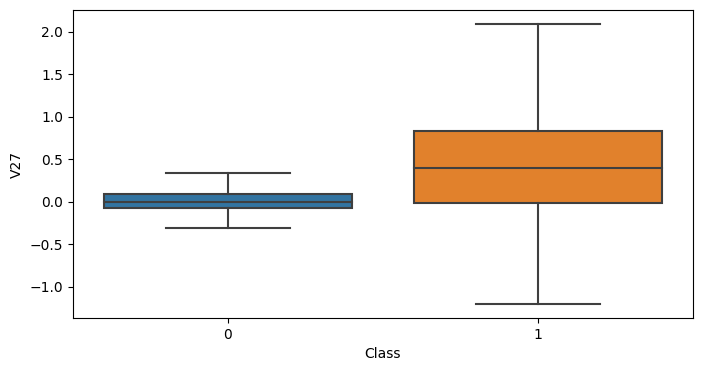

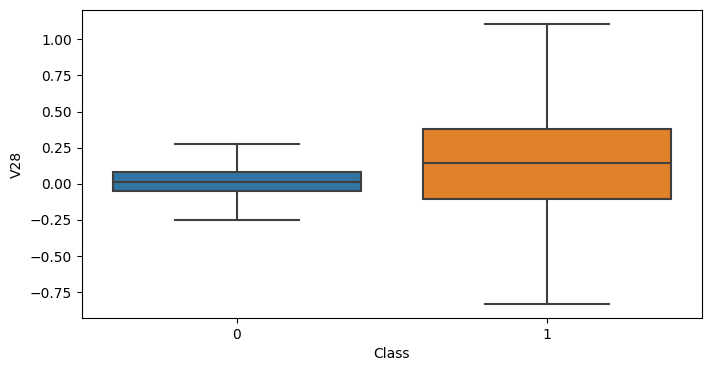

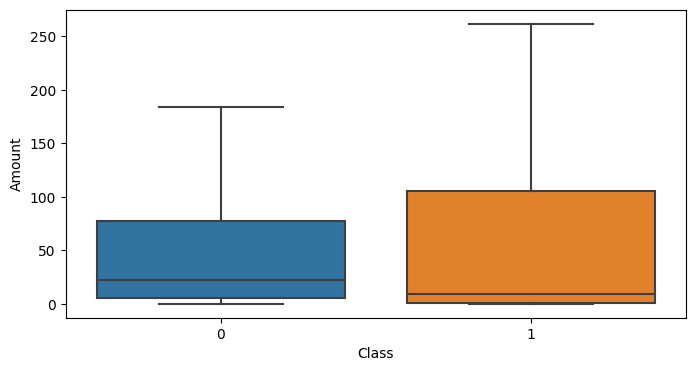

In [21]:
#distribution of features by class
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
            'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
            'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
for feature in features:
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.boxplot(x='Class', y=feature, data=df_original, showfliers=False)


#### 4. Model Selection

In [22]:
# Split the data into training and testing sets
df = df.dropna(subset=['Class'])  # Drop rows with missing values in 'Class' column
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Class'], how="all")  # Drop rows with infinite values in 'Class' column
df['Class'] = df['Class'].astype(int)  # Convert 'Class' column to integers

# fill missing values with mean
df.fillna(df.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42)

In [23]:
df

,Class,Amount_Max,Amount_Min,Amount_Mean,Amount_Median,V_sum,V_mean,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,Amount_Range,V_Range,PCA_Sum
0,0,0.244200,-0.342584,-0.049192,-0.049192,2.802489,0.100089,0.393045,-2.459278,0.198863,0.652778,-0.078665,0.589174,0.427149,0.832087,-0.046281,-1.081149,0.586784,2.702400,-0.572277
1,0,0.244200,-0.342584,-0.049192,-0.049192,3.401201,0.121471,-0.398452,-2.074113,0.012565,-0.908037,-0.431302,0.184444,-0.305611,-0.832143,0.608266,1.294197,0.586784,3.279730,-2.850185
2,0,1.158900,0.139886,0.649393,0.649393,0.619255,0.022116,1.805540,-2.392468,0.181762,-0.893590,-0.059950,0.689277,-1.703444,1.400341,1.136999,-1.268394,1.019014,0.597139,-1.103928
3,0,1.158900,0.139886,0.649393,0.649393,-3.163440,-0.112980,0.357379,-1.775766,0.157937,0.244197,-0.123868,1.748073,-1.306702,0.581966,-1.595826,-0.469684,1.019014,-3.050460,-2.182293
4,0,-0.073813,-0.338670,-0.206242,-0.206242,6.451518,0.230411,-0.024193,-1.512481,0.298240,0.671169,-0.150886,1.570934,0.551197,0.084443,0.190173,-0.663283,0.264857,6.221107,1.015313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0,-0.350252,-0.350252,-0.350252,-0.350252,13.202981,0.471535,-0.000006,-0.000077,-0.000024,-0.000098,0.000116,-0.000087,0.000154,0.000192,0.000175,0.000185,0.000000,12.731446,0.000530
284803,0,-0.254325,-0.254325,-0.254325,-0.254325,-1.898147,-0.067791,-0.000006,-0.000077,-0.000024,-0.000098,0.000116,-0.000087,0.000154,0.000192,0.000175,0.000185,0.000000,-1.830356,0.000530
284804,0,-0.082239,-0.313391,-0.197815,-0.197815,6.606631,0.235951,-0.000006,-0.000077,-0.000024,-0.000098,0.000116,-0.000087,0.000154,0.000192,0.000175,0.000185,0.231151,6.370680,0.000530
284805,0,-0.082239,-0.313391,-0.197815,-0.197815,7.060626,0.252165,-0.000006,-0.000077,-0.000024,-0.000098,0.000116,-0.000087,0.000154,0.000192,0.000175,0.000185,0.231151,6.808461,0.000530


In [24]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_precision = precision_score(y_test, lr_preds)
lr_recall = recall_score(y_test, lr_preds)
lr_f1 = f1_score(y_test, lr_preds)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_precision = precision_score(y_test, dt_preds)
dt_recall = recall_score(y_test, dt_preds)
dt_f1 = f1_score(y_test, dt_preds)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)

# Neural Network
nn = MLPClassifier()
nn.fit(X_train, y_train)
nn_preds = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_preds)
nn_precision = precision_score(y_test, nn_preds)
nn_recall = recall_score(y_test, nn_preds)
nn_f1 = f1_score(y_test, nn_preds)

# Print out scores for each model
print("Logistic Regression Scores:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)

print("\nDecision Tree Scores:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)

print("\nRandom Forest Scores:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

print("\nNeural Network Scores:")
print("Accuracy:", nn_accuracy)
print("Precision:", nn_precision)
print("Recall:", nn_recall)
print("F1 Score:", nn_f1)


Logistic Regression Scores:
Accuracy: 0.9985373418390724
Precision: 0.5945945945945946
Recall: 0.24444444444444444
F1 Score: 0.3464566929133858

Decision Tree Scores:
Accuracy: 0.9979381806647164
Precision: 0.3333333333333333
Recall: 0.3
F1 Score: 0.3157894736842105

Random Forest Scores:
Accuracy: 0.9986783209389208
Precision: 0.7419354838709677
Recall: 0.25555555555555554
F1 Score: 0.38016528925619836

Neural Network Scores:
Accuracy: 0.9981320269270081
Precision: 0.42
Recall: 0.4666666666666667
F1 Score: 0.4421052631578947


#### 5. Model tuning


In [25]:
# Logistic Regression
lr = LogisticRegression()
params = {'C': [0.1, 1, 10]}
grid_lr = GridSearchCV(lr, params, cv=5, scoring='f1')
grid_lr.fit(X_train, y_train)
lr_best = grid_lr.best_estimator_
lr_y_pred = lr_best.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred)


In [26]:

# Decision Tree
dt = DecisionTreeClassifier()
params = {'max_depth': [5, 10, 15]}
grid_dt = GridSearchCV(dt, params, cv=5, scoring='f1')
grid_dt.fit(X_train, y_train)
dt_best = grid_dt.best_estimator_
dt_y_pred = dt_best.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)


In [27]:

# Random Forest
rf = RandomForestClassifier()
params = {'n_estimators': [10, 50], 'max_depth': [5, 10]} # n_estimators = 100,200 for better
grid_rf = GridSearchCV(rf, params, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)
rf_best = grid_rf.best_estimator_
rf_y_pred = rf_best.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)


In [28]:
# Neural Network
nn = MLPClassifier()
params = {'hidden_layer_sizes': [(10,), (10, 10)], 'alpha': [0.0001, 0.001]}
grid_nn = GridSearchCV(nn, params, cv=5, scoring='f1')
grid_nn.fit(X_train, y_train)
nn_best = grid_nn.best_estimator_
nn_y_pred = nn_best.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_y_pred)
nn_precision = precision_score(y_test, nn_y_pred)
nn_recall = recall_score(y_test, nn_y_pred)
nn_f1 = f1_score(y_test, nn_y_pred)

In [29]:
print("Logistic Regression - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}".format(lr_accuracy, lr_precision, lr_recall, lr_f1))
print("Decision Tree - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}".format(dt_accuracy, dt_precision, dt_recall, dt_f1))
print("Random Forest - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}".format(rf_accuracy, rf_precision, rf_recall, rf_f1))
print("Neural Network - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}".format(nn_accuracy, nn_precision, nn_recall, nn_f1))


Logistic Regression - Accuracy: 0.9985, Precision: 0.5946, Recall: 0.2444, F1 Score: 0.3465
Decision Tree - Accuracy: 0.9987, Precision: 0.8333, Recall: 0.2222, F1 Score: 0.3509
Random Forest - Accuracy: 0.9987, Precision: 0.8077, Recall: 0.2333, F1 Score: 0.3621
Neural Network - Accuracy: 0.9985, Precision: 0.6522, Recall: 0.1667, F1 Score: 0.2655


#### 6. Model Interpretation

In [33]:
# calculate feature importances using permutation importance for logistic regression
lr.fit(X_train, y_train)
lr_importances = permutation_importance(lr, X_test, y_test, scoring='accuracy').importances_mean

# calculate feature importances using permutation importance for decision tree
dt.fit(X_train, y_train)
dt_importances = permutation_importance(dt, X_test, y_test, scoring='accuracy').importances_mean

# calculate feature importances using permutation importance for random forest
rf.fit(X_train, y_train)
rf_importances = permutation_importance(rf, X_test, y_test, scoring='accuracy').importances_mean


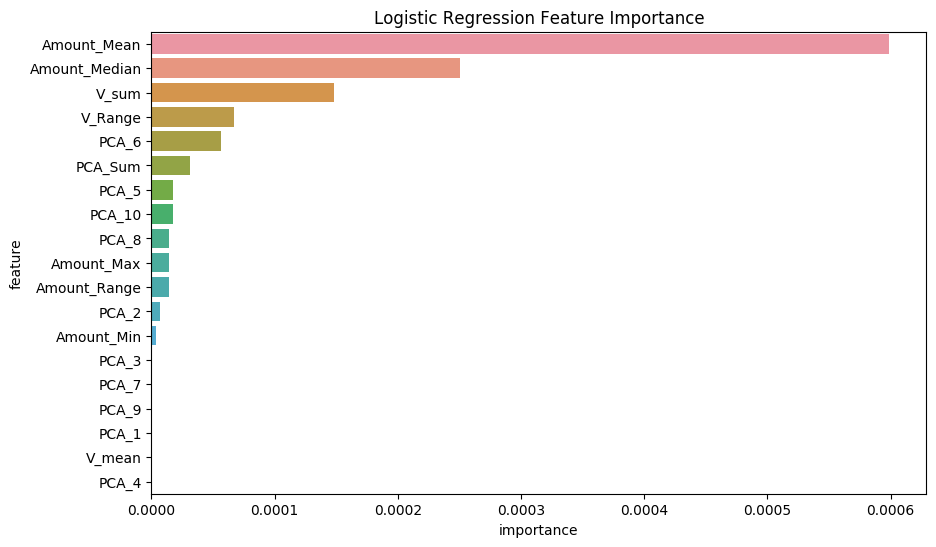

In [34]:
# plotting feature importances for logistic regression
lr_feature_importances = pd.DataFrame({'feature': X_test.columns, 'importance': lr_importances})
lr_feature_importances = lr_feature_importances.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=lr_feature_importances)
plt.title('Logistic Regression Feature Importance')
plt.show()


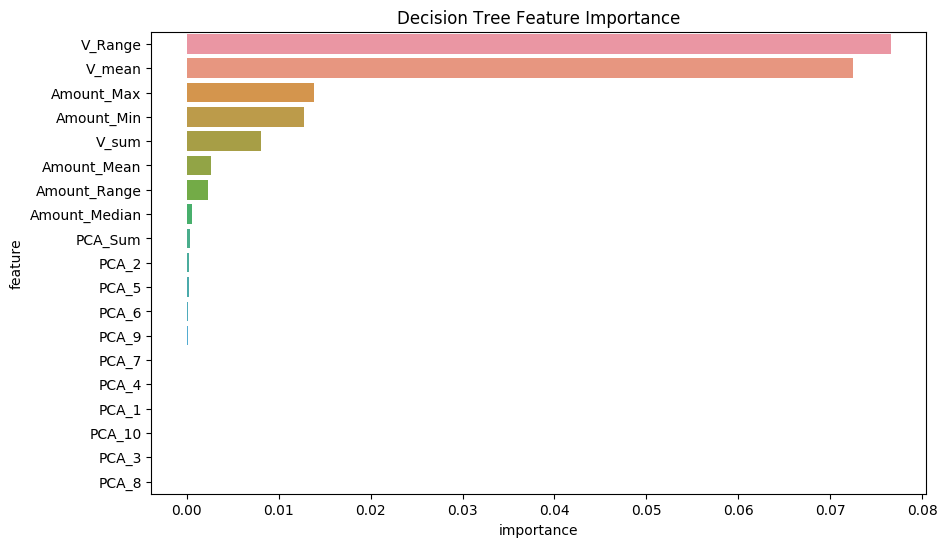

In [35]:
# plotting feature importances for decision tree
dt_feature_importances = pd.DataFrame({'feature': X_test.columns, 'importance': dt_importances})
dt_feature_importances = dt_feature_importances.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=dt_feature_importances)
plt.title('Decision Tree Feature Importance')
plt.show()

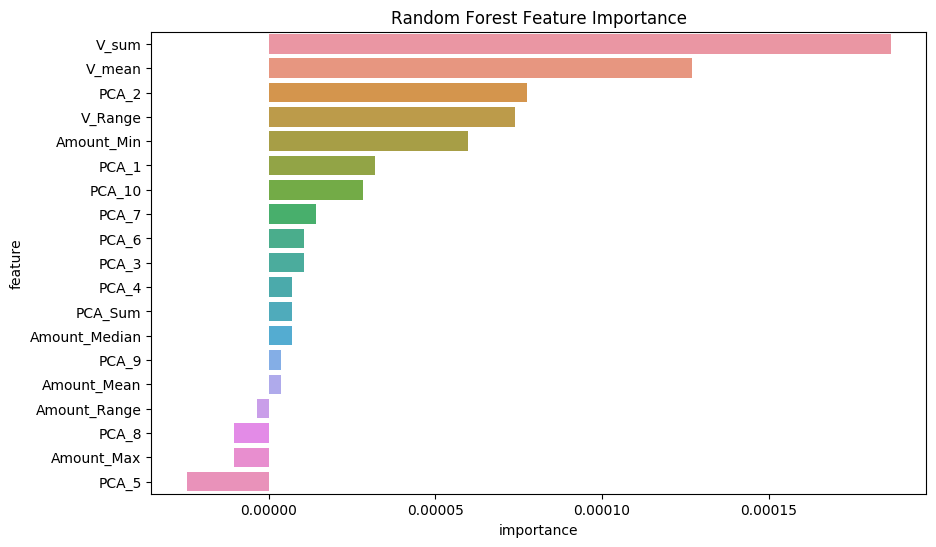

In [36]:
# plotting feature importances for random forest
rf_feature_importances = pd.DataFrame({'feature': X_test.columns, 'importance': rf_importances})
rf_feature_importances = rf_feature_importances.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=rf_feature_importances)
plt.title('Random Forest Feature Importance')
plt.show()

In [37]:
rf_feature_importances

,feature,importance
4,V_sum,0.000187
5,V_mean,0.000127
7,PCA_2,0.000078
17,V_Range,0.000074
1,Amount_Min,0.000060
6,PCA_1,0.000032
15,PCA_10,0.000028
12,PCA_7,0.000014
11,PCA_6,0.000011
8,PCA_3,0.000011


#### 7. Recommendations

Based on the feature importances, The top 5 features and the recommendations are as follows.
    
1. V_sum and V_mean: These features are related to the total and average transaction amounts, respectively. Credit card companies may want to focus on detecting transactions with unusually high or low amounts, as these could be indicators of fraud.

2. PCA_2: This feature is related to a principal component derived from the original features. Without additional information, it's difficult to know exactly what this component represents. However, credit card companies could explore the relationship between this component and fraud detection to see if it provides additional information beyond the original features.

3. V_Range: This feature represents the range of transaction amounts. Credit card companies could investigate whether transactions with a large range of amounts are more likely to be fraudulent.

4. Amount_Min: This feature represents the minimum transaction amount. Credit card companies could investigate whether there is a threshold below which transactions are more likely to be fraudulent.

Overall, credit card companies could use these feature importances as a starting point for building models to detect fraud. However, it's important to keep in mind that feature importance is just one aspect of model building, and other factors such as data quality and model validation also need to be considered.